# Getting Started in Machine Learning
### Chapter 13: Naive Bayes
This notebook contains examples from the book:

Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019.

<font style="font-size:xx-small; font-family:courier;">

    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
           header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
data[:3]

,mpg,cyl,displ,hp,weight,accel,model,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""


In [3]:
cardata=np.array(data[["cyl","mpg","accel"]])
cardata[:3]

array([[ 8. , 18. , 12. ],
       [ 8. , 15. , 11.5],
       [ 8. , 18. , 11. ]])

In [4]:
cars=np.array([line for line in cardata if line[0] in [4,6,8]])
len(cars),len(cardata)

(385, 392)

In [5]:
cylinders=np.unique(cars[:,0])
print(cylinders)
Y=np.array([float(cylinders.tolist().index(j)) for j in cars[:,0]])

[4. 6. 8.]


In [6]:
#Y=cars[:,0]/2-2
X=cars[:,1:]

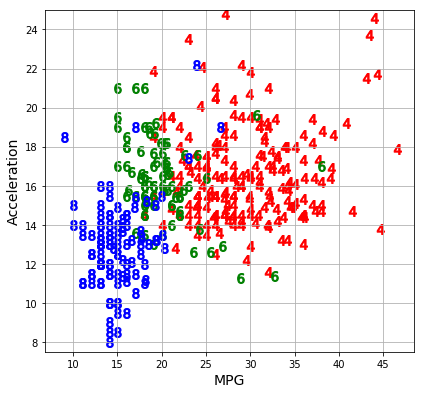

In [7]:
colors=["red", "green","blue"]
markers=["$4$","$6$","$8$"]
nclasses=3
for i in range(nclasses):
    x,y=zip(*X[Y==i])
    plt.scatter(x,y,marker=markers[i],color=colors[i],s=100)

plt.xlabel("MPG",fontsize=14)
plt.ylabel("Acceleration",fontsize=14)
plt.ylim([7.5,25])
plt.grid()
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(6,6)

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

## Single Train/Test Split - Naive Bayes

In [9]:
gnb=GaussianNB()
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
gnb.fit(XTRAIN,YTRAIN)
YP=gnb.predict(XTEST)

In [10]:
print(confusion_matrix(YTEST,YP))
err = 1-accuracy_score(YTEST,YP)
print("error = %7.6f" %err)

[[46 10  1]
 [ 2 11  6]
 [ 0  0 21]]
error = 0.195876


## Repeat  Naive Bayes with 100 splits

In [11]:
errs=[]
nsplits = 100
for split in range(nsplits):
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=.25)
    gnb.fit(XTRAIN,YTRAIN)
    YP=gnb.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
print("%d Splits: Mean Error=%7.6f +/- %7.6f (95%%)"\
      %(nsplits, np.mean(errs),1.96*np.std(errs)))
print(confusion_matrix(YTEST,YP))

100 Splits: Mean Error=0.129485 +/- 0.050823 (95%)
[[48  7  1]
 [ 1 18  2]
 [ 1  0 19]]


In [12]:
np.mean(errs)-1.96*np.std(errs), np.mean(errs)+1.96*np.std(errs)

(0.0786612594678194, 0.180307812697129)

In [13]:
from scipy.stats import kurtosis
kurtosis(X, fisher=False)

array([2.45939109, 3.46390269])

In [14]:
def visualize_clasifier_contours(clf,X,Y,DX,DY,thelevels,colors,markers,xlab="X",
                                ylab="Y", filename='classifier-figure.pdf'):
    xinterval = X[:, 0].min() - 1, X[:, 0].max() + 1
    yinterval = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(*xinterval, DX),
                         np.arange(*yinterval, DY))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    c=plt.contour(xx, yy, Z, alpha=1,levels=thelevels,linewidths=2,colors="k")
    c=plt.contourf(xx, yy, Z, alpha=.1)

  
    nclasses=len(colors)
    for i in range(nclasses):
        x,y=zip(*X[Y==i])
        plt.scatter(x,y,marker=markers[i],color=colors[i],s=100)


    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.grid()
    fig=plt.gcf()
    fig.tight_layout()
    fig.set_size_inches(6,6)
    fig.savefig(filename)

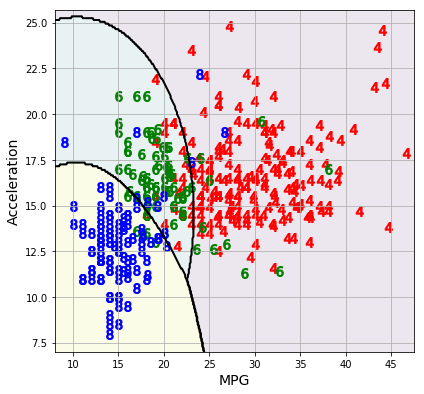

In [15]:
colors=["red", "green","blue"]
markers=["$4$","$6$","$8$"]
visualize_clasifier_contours(gnb,X,Y,.1,.1, [0.5,1.5],colors,markers,"MPG","Acceleration")

In [16]:
np.corrcoef(X,rowvar=False)

array([[1.        , 0.41933704],
       [0.41933704, 1.        ]])

## Add more features

In [17]:
X=np.array(data[["mpg","displ","hp","accel"]])

### Make Y a list of 0,1,2,3,4 represent 3,4,5,6, or 8 cylinders

In [18]:
Y=np.array(data["cyl"])
unis=np.unique(Y).tolist()
print(unis)
Y=np.array([unis.index(j) for j in Y])

[3, 4, 5, 6, 8]


In [19]:
errs=[]
for j in range(100):
    XTRAIN,XTEST,YTRAIN,YTEST=train_test_split(X,Y)
    gnb=GaussianNB()
    gnb.fit(XTRAIN,YTRAIN)
    YP=gnb.predict(XTEST)
    errs.append(1-accuracy_score(YP,YTEST))
#np.mean(accs),np.std(accs)
print("%d Splits: Mean Error=%7.6f +/- %7.6f (95%%)"\
      %(nsplits, np.mean(errs),1.96*np.std(errs)))
print("Last confusion matrix:")
print(confusion_matrix(YP, YTEST))

100 Splits: Mean Error=0.041939 +/- 0.034744 (95%)
Last confusion matrix:
[[ 1  0  0  0]
 [ 1 44  0  0]
 [ 0  0 25  2]
 [ 0  0  0 25]]


# Does adding origin help?

## Repeat, including Origin as a feature - encode using 1-Hot encoding

1. 1 = American
2. 2 = European
3. 3 = Asian

In [20]:
origin=np.array(data["origin"])
amer=np.array([1 if j==1 else 0 for j in origin]).reshape(-1,1)
euro=np.array([1 if j==2 else 0 for j in origin]).reshape(-1,1)
asia=np.array([1 if j==3 else 0 for j in origin]).reshape(-1,1)

In [21]:
X=np.array(data[["mpg","displ","hp","accel"]])
X=np.hstack((X,amer,euro,asia))
print(X.shape)
X

(392, 7)


array([[ 18., 307., 130., ...,   1.,   0.,   0.],
       [ 15., 350., 165., ...,   1.,   0.,   0.],
       [ 18., 318., 150., ...,   1.,   0.,   0.],
       ...,
       [ 32., 135.,  84., ...,   1.,   0.,   0.],
       [ 28., 120.,  79., ...,   1.,   0.,   0.],
       [ 31., 119.,  82., ...,   1.,   0.,   0.]])

### Make Y a list of 0,1,2,3,4 represent 3,4,5,6, or 8 cylinders

In [22]:
Y=np.array(data["cyl"])
unis=np.unique(Y).tolist()
print(unis)
Y=np.array([unis.index(j) for j in Y])

[3, 4, 5, 6, 8]


In [23]:
errs=[]
for j in range(100):
    gnb=GaussianNB()
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    gnb.fit(XTRAIN,YTRAIN)
    YP=gnb.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
print("%d Splits: Mean Error=%7.6f +/- %7.6f (95%%)"\
      %(nsplits, np.mean(errs),1.96*np.std(errs)))
print("Last confusion matrix:")
print(confusion_matrix(YP,YTEST))

100 Splits: Mean Error=0.352857 +/- 0.137206 (95%)
Last confusion matrix:
[[38  1  3  0]
 [ 4  0  0  0]
 [ 4  0  0  0]
 [ 0  0 21 27]]


## This seemed to make it worse! 

## Let's do an Independent Component Analysis

In [24]:
from sklearn.decomposition import FastICA

Single run example

In [25]:
ICA=FastICA(n_components=2)
ICA.fit(X)
F=ICA.transform(X)
gnb=GaussianNB()
XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(F,Y)
gnb.fit(XTRAIN,YTRAIN)
YP=gnb.predict(XTEST)
print(1-accuracy_score(YP,YTEST))
print(confusion_matrix(YP,YTEST))


0.09183673469387754
[[49  1  4  0]
 [ 0  0  0  0]
 [ 2  1 21  1]
 [ 0  0  0 19]]


cycle through multiple components and multiple runs

In [26]:
nsplits=100
for ncomp in range(2,8):
    ICA=FastICA(n_components=ncomp)
    ICA.fit(X)
    F=ICA.transform(X)
    errs=[]
    for j in range(nsplits):
        gnb=GaussianNB()
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(F,Y)
        gnb.fit(XTRAIN,YTRAIN)
        YP=gnb.predict(XTEST)
        errs.append(1-accuracy_score(YTEST,YP))
    print("%d Splits, %d Components: Mean Error=%7.6f +/- %7.6f (95%%)"\
      %(nsplits,ncomp, np.mean(errs),1.96*np.std(errs)))


100 Splits, 2 Components: Mean Error=0.087551 +/- 0.045182 (95%)
100 Splits, 3 Components: Mean Error=0.115918 +/- 0.058619 (95%)
100 Splits, 4 Components: Mean Error=0.109592 +/- 0.055686 (95%)
100 Splits, 5 Components: Mean Error=0.113571 +/- 0.060243 (95%)
100 Splits, 6 Components: Mean Error=0.131327 +/- 0.061881 (95%)
100 Splits, 7 Components: Mean Error=0.146122 +/- 0.096078 (95%)


## A gaussian distribution has a Pearson kurtosis of 3 (fisher=False)

In [27]:
from scipy.stats import kurtosis
kurtosis(X, fisher=False)

array([2.47529742, 2.21630802, 3.67282189, 3.42332033, 1.26666667,
       3.97458243, 3.21442148])

## Covariance

In [28]:
cmat=np.round(np.corrcoef(X,rowvar=False),3)
cmat

array([[ 1.   , -0.805, -0.778,  0.423, -0.565,  0.244,  0.451],
       [-0.805,  1.   ,  0.897, -0.544,  0.656, -0.372, -0.441],
       [-0.778,  0.897,  1.   , -0.689,  0.49 , -0.285, -0.322],
       [ 0.423, -0.544, -0.689,  1.   , -0.258,  0.208,  0.115],
       [-0.565,  0.656,  0.49 , -0.258,  1.   , -0.591, -0.649],
       [ 0.244, -0.372, -0.285,  0.208, -0.591,  1.   , -0.23 ],
       [ 0.451, -0.441, -0.322,  0.115, -0.649, -0.23 ,  1.   ]])

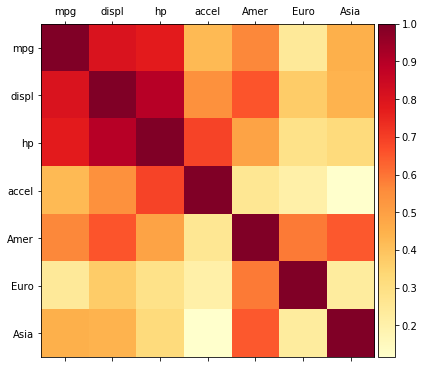

In [29]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.figure()
ax=plt.gca()
cm=ax.matshow(abs(cmat),cmap="YlOrRd")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
ax.set_xticks(range(7))
ax.set_yticks(range(7))
ax.set_xticklabels(["mpg","displ","hp","accel","Amer","Euro","Asia"])
ax.set_yticklabels(["mpg","displ","hp","accel","Amer","Euro","Asia"]);

plt.colorbar(cm, cax=cax)
#plt.colorbar(cm)
plt.gcf().set_size_inches(6,6)
plt.gcf().tight_layout()
plt.gcf().savefig("correlation-matrix-mpg-data.pdf")

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7)
pca.fit(X)
print(pca.explained_variance_ratio_)
for ratio in pca.explained_variance_ratio_:
    print("%10.7f" %ratio)
    #P=pca.transform(X)
print(sum(pca.explained_variance_ratio_[3:]))

[9.77103869e-01 2.09376473e-02 1.64085614e-03 2.88975479e-04
 1.44868553e-05 1.41656401e-05 6.19652520e-37]
 0.9771039
 0.0209376
 0.0016409
 0.0002890
 0.0000145
 0.0000142
 0.0000000
0.0003176279742696323


In [31]:
maxcomp=8

for ncomp in range(2,maxcomp):
    pca=PCA(n_components=ncomp)
    pca.fit(X)
    P=pca.transform(X)
    n=100; accs=[]
    errs=[]
    for j in range(n):
        gnb=GaussianNB()
        PTRAIN, PTEST, YTRAIN, YTEST=train_test_split(P,Y)
        gnb.fit(PTRAIN,YTRAIN)
        YP=gnb.predict(PTEST)
        errs.append(1-accuracy_score(YP,YTEST))
    print("%d Splits, %d comp: Mean Error=%7.6f +/- %7.6f (95%%)"\
      %(n, ncomp, np.mean(errs),1.96*np.std(errs)))
print(pca.explained_variance_ratio_)


100 Splits, 2 comp: Mean Error=0.036531 +/- 0.032641 (95%)
100 Splits, 3 comp: Mean Error=0.045510 +/- 0.041801 (95%)
100 Splits, 4 comp: Mean Error=0.043469 +/- 0.039051 (95%)
100 Splits, 5 comp: Mean Error=0.051735 +/- 0.043290 (95%)
100 Splits, 6 comp: Mean Error=0.069184 +/- 0.045658 (95%)
100 Splits, 7 comp: Mean Error=0.065918 +/- 0.047952 (95%)
[9.77103869e-01 2.09376473e-02 1.64085614e-03 2.88975479e-04
 1.44868553e-05 1.41656401e-05 6.19652520e-37]


# SOLVE A DIFFERENT PROBLEM

## Try to predict origin as a function of mpg, cyl, displ, hp, weight, accel


## Will need to encode cyl as a categorical variable

In [32]:
data.columns

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'model', 'origin',
       'carname'],
      dtype='object')

In [33]:
np.unique(np.array(data["cyl"]))

array([3, 4, 5, 6, 8])

### One-Hot encoding of cylinders and convert to column vectors

In [34]:
cyl=np.array(data["cyl"])
cyl3=np.array([1 if j==3 else 0 for j in cyl]).reshape(-1,1)
cyl4=np.array([1 if j==4 else 0 for j in cyl]).reshape(-1,1)
cyl5=np.array([1 if j==5 else 0 for j in cyl]).reshape(-1,1)
cyl6=np.array([1 if j==6 else 0 for j in cyl]).reshape(-1,1)
cyl8=np.array([1 if j==8 else 0 for j in cyl]).reshape(-1,1)

### Extract the numerical features

In [35]:
X=np.array(data[['mpg', 'displ', 'hp', 'weight', 'accel']])
X[:10]

array([[  18. ,  307. ,  130. , 3504. ,   12. ],
       [  15. ,  350. ,  165. , 3693. ,   11.5],
       [  18. ,  318. ,  150. , 3436. ,   11. ],
       [  16. ,  304. ,  150. , 3433. ,   12. ],
       [  17. ,  302. ,  140. , 3449. ,   10.5],
       [  15. ,  429. ,  198. , 4341. ,   10. ],
       [  14. ,  454. ,  220. , 4354. ,    9. ],
       [  14. ,  440. ,  215. , 4312. ,    8.5],
       [  14. ,  455. ,  225. , 4425. ,   10. ],
       [  15. ,  390. ,  190. , 3850. ,    8.5]])

In [36]:
X.shape

(392, 5)

In [37]:
cyl3.shape

(392, 1)

### Append each cylinder as an additional column to X

In [38]:
X=np.hstack((X,cyl3,cyl4,cyl5,cyl6,cyl8))
X

array([[ 18., 307., 130., ...,   0.,   0.,   1.],
       [ 15., 350., 165., ...,   0.,   0.,   1.],
       [ 18., 318., 150., ...,   0.,   0.,   1.],
       ...,
       [ 32., 135.,  84., ...,   0.,   0.,   0.],
       [ 28., 120.,  79., ...,   0.,   0.,   0.],
       [ 31., 119.,  82., ...,   0.,   0.,   0.]])

### run naaive Bayes on extended feature matrix that includes 1-hot encoding of number of cylinders

In [39]:
gnb=GaussianNB()
errs=[]
n=100
for j in range(n):
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    gnb.fit(XTRAIN,YTRAIN)
    YP=gnb.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
print("%d Splits: Mean Error=%7.6f +/- %7.6f (95%%)"\
      %(n, np.mean(errs),1.96*np.std(errs)))

100 Splits: Mean Error=0.006531 +/- 0.019083 (95%)


#### Look at typical confusion matrix

(last one in the previous iteration)

In [40]:
print(confusion_matrix(YTEST,YP))

[[ 0  1  0  0]
 [ 0 54  0  0]
 [ 0  0 18  0]
 [ 0  0  0 25]]
